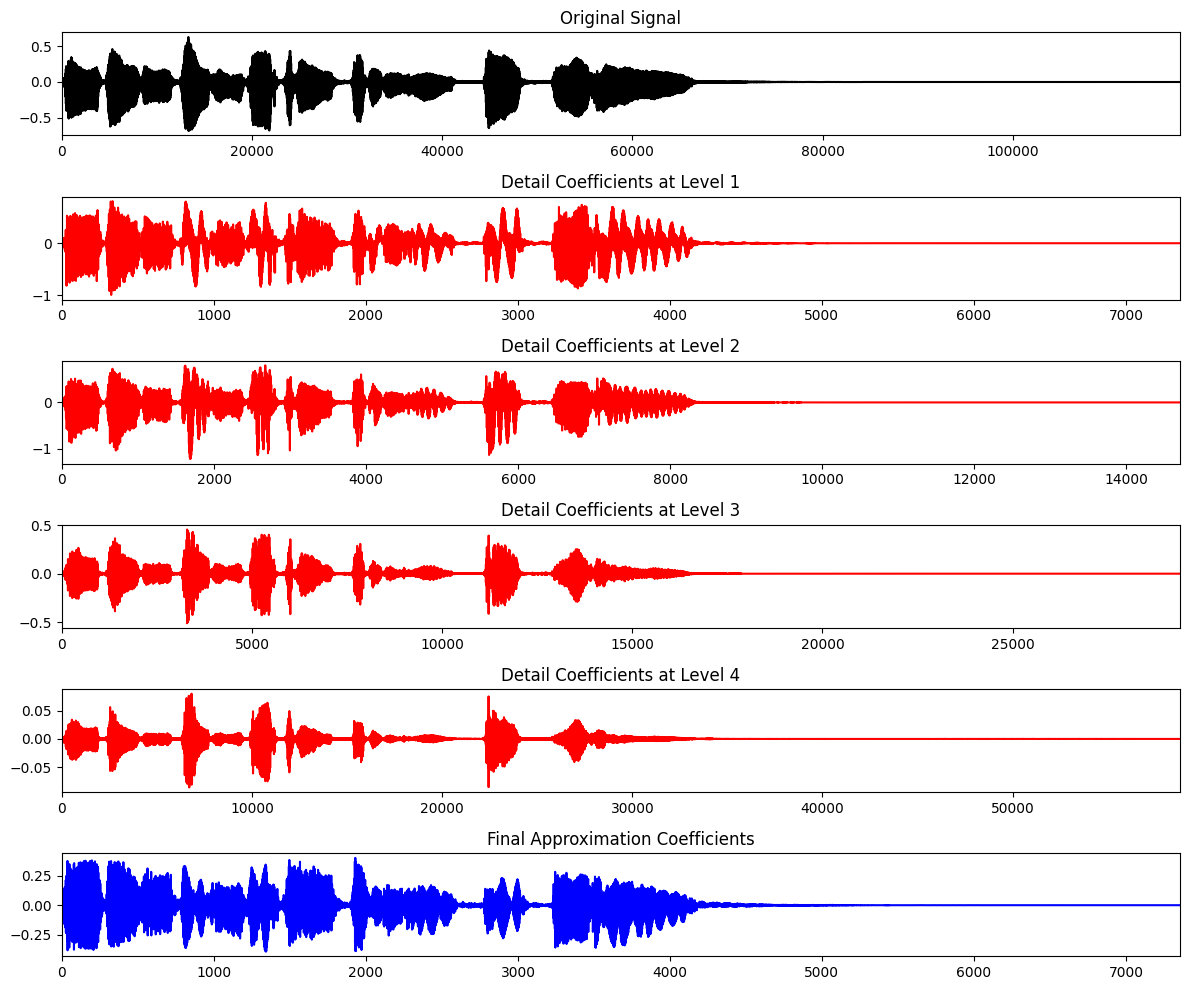

In [1]:
import librosa
import pywt
import matplotlib.pyplot as plt

# 트럼펫 샘플 불러오기
y, sr = librosa.load(librosa.ex('trumpet'))

# 다중 해상도 분석 (Multi-Resolution Analysis, MRA)
wavename = 'db4' # Daubechies 4 wavelet 사용
max_level = 4  # 4단계 DWT 수행
coeffs = pywt.wavedec(y, wavename, level=max_level)

# 원본 신호 시각화
plt.figure(figsize=(12, 10))
plt.subplot(max_level + 2, 1, 1)
plt.plot(y, color='black')
plt.title("Original Signal")
plt.xlim([0, len(y)])

# 각 단계별 Approximation 및 Detail 계수 시각화
for i in range(1, max_level + 1):
    plt.subplot(max_level + 2, 1, i + 1)
    plt.plot(coeffs[i], color='red')
    plt.title(f"Detail Coefficients at Level {i}")
    plt.xlim([0, len(coeffs[i])])

# 마지막 Approximation 계수 시각화
plt.subplot(max_level + 2, 1, max_level + 2)
plt.plot(coeffs[0], color='blue')
plt.title("Final Approximation Coefficients")
plt.xlim([0, len(coeffs[0])])

plt.tight_layout()
plt.show()


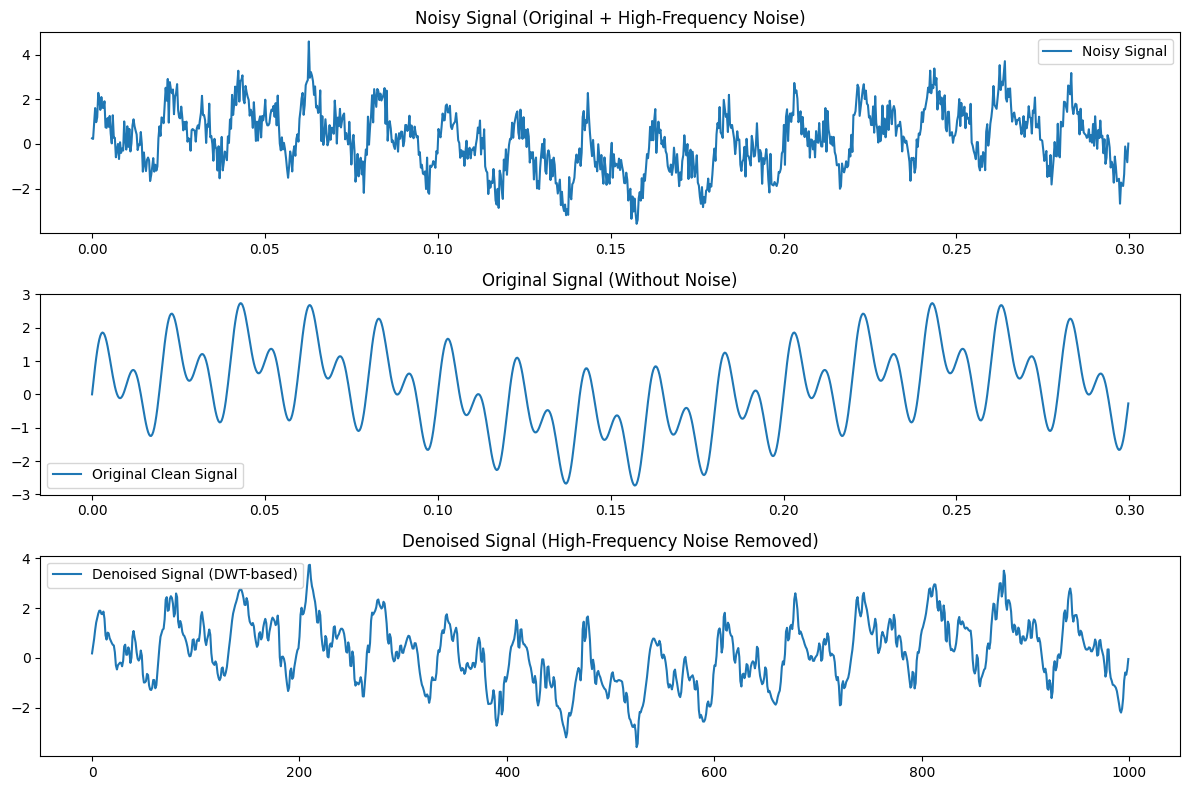

In [23]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 샘플링 주파수 및 시간 설정
fs = 1000  # 샘플링 주파수 (Hz)
t = np.linspace(0, 0.3, fs, endpoint=False)  # 1초 동안의 샘플

# 사인파 합성 (기본 신호)
freqs = [5, 50, 100]  # 주파수 성분 (Hz)
signal = sum(np.sin(2 * np.pi * f * t) for f in freqs)  # 여러 주파수를 합성

# 고주파 노이즈 추가
np.random.seed(42)
noise = 0.5 * np.random.randn(len(t))  # 고주파 노이즈 생성
noisy_signal = signal + noise  # 원래 신호에 노이즈 추가

# DWT 수행 (다중 레벨)
wavelet = 'db4'
coeffs = pywt.wavedec(noisy_signal, wavelet, level=3)

# 고주파 성분 제거 (D1, D2를 0으로 설정)
coeffs_filtered = [coeffs[0], coeffs[1], coeffs[2], np.zeros_like(coeffs[3])]

# IDWT 수행 (노이즈 제거된 신호 복원)
denoised_signal = pywt.waverec(coeffs_filtered, wavelet)

# 시각화
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, noisy_signal, label="Noisy Signal")
plt.title("Noisy Signal (Original + High-Frequency Noise)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, signal, label="Original Clean Signal")
plt.title("Original Signal (Without Noise)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(denoised_signal[:len(t)], label="Denoised Signal (DWT-based)")
plt.title("Denoised Signal (High-Frequency Noise Removed)")
plt.legend()

plt.tight_layout()
plt.show()
